# Demo DBSCAN

By Jean Carlo Alvarez

# Importar Librerias

In [11]:
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

**import pandas as pd** trabajar con datos en tablas puede leer manipular y analizar datos facilmente

**from sklearn.cluster import DBSCAN**

¿Para qué sirve?

Para agrupar datos (clustering) según densidad. Es útil para encontrar patrones o grupos en los datos

**Parámetros básicos:**

- eps: Qué tan cerca deben estar los puntos para agruparse (distancia)
- min_samples: Número mínimo de puntos para formar un grupo

Ejemplo: Encuentra grupos de clientes con comportamiento similar

**import matplotlib.pyplot as plt** librearia que me permite P hacer gráficos

# Cargar datos

In [12]:
df = df = pd.read_csv('./casas.csv')
df=df.dropna()
df.sample(10)

,1,6
282,22,7
286,22,19
131,10,10
95,8,6
55,5,21
202,15,23
65,6,8
246,19,19
87,7,19
173,13,14


**df = pd.read_csv('./casas.csv')**

Lee un archivo CSV llamado casas.csv y lo carga en un dataframe de Pandas

**df = df.dropna()**

Elimina las filas del dataframe que contienen valores nulos
Parametros de **dropna()**
- axis:
  - axis=0 (por defecto): Elimina filas con valores nulos

  - axis=1: Elimina columnas con valores nulos.
- how:
 - 'any' (por defecto): Elimina filas o columnas si cualquier valor es nulo.
 - 'all': Elimina filas o columnas si todos los valores son nulos

**df.sample(10)**

Devuelve una muestra aleatoria de 10 filas del dataframe

# Analisis

In [13]:
pred = DBSCAN(eps=2,min_samples=10).fit_predict(df)
print(pred)

[-1 -1  0  0  0  0 -1  1  1 -1 -1 -1 -1  0  0  0  0  0  0  1  1  1 -1 -1
  0  0  0  0  0  0  0  1  1  1  1  1 -1  0  0  0  0  0  0  0  0  1  1  1
  1  1  1 -1 -1  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  0  0  0  0
  0  0  0  0  0  0  1  1  1  1  1  1 -1  0  0  0  0  0  0  0  0  0  0  1
  1  1  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  0  0
  0  0  0  0  0  0  0  0 -1  1  1  1  0  0  0  0  0  0  0  0  0  0  0 -1
  1  1  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0
  0 -1 -1 -1  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0
  0 -1  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0  0 -1 -1 -1  0
  0  0  0  0  0  0  0  0 -1  2 -1  0  0  0  0  0  2  2  2 -1 -1 -1  0  0
  0  0  0  0  0  2  2  2  2  2  2  2  0  0  0  0  0  0  2  2  2  2  2  2
  2  2  2 -1 -1 -1  0  2  2  2  2  2  2  2  2  2 -1 -1 -1 -1  2  2  2  2
  2  2  2  2 -1 -1 -1 -1 -1  2  2  2  2 -1 -1  2  2 -1]


**DBSCAN(eps=2, min_samples=10)**

Crea un modelo de clustering usando el algoritmo DBSCAN. Este algoritmo identifica grupos (clusters) basados en la densidad de puntos en un espacio
Los puntos que no cumplen los criterios de densidad son clasificados como ruido

**Parámetros clave:**

- **eps=2:**

Define la distancia máxima entre dos puntos para que se consideren vecinos. Un valor más bajo significa que los puntos deben estar más cerca para formar un cluster

- **min_samples=10:**
Número mínimo de puntos que deben estar dentro de la distancia eps (incluido el punto en sí) para que un punto sea considerado núcleo de un cluster

**fit_predict(df)**

Ajusta el modelo a los datos y devuelve las etiquetas de los clusters asignados a cada punto

**Cosas a ver**

- Cada punto del dataframe será asignado a un cluster identificado con un entero (0, 1, 2, etc.)

- Los puntos considerados ruido (que no pertenecen a ningún cluster) serán asignados al cluster -1

**print(pred)**

Muestra las etiquetas de los clusters para cada punto en el dataframe df
**Resultado esperado**:
Un array del mismo tamaño que el número de filas en df

# Graficamos

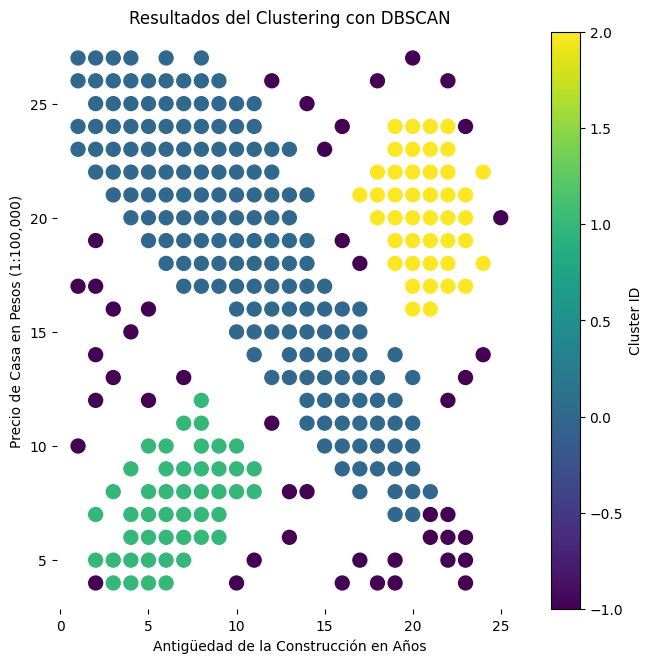

In [14]:
plt.figure(figsize=(7.5, 7.5))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=pred, s=100)
plt.xlabel("Antigüedad de la Construcción en Años")
plt.ylabel("Precio de Casa en Pesos (1:100,000)")
plt.colorbar(label="Cluster ID")
plt.title("Resultados del Clustering con DBSCAN")
plt.box(False)
plt.show()

**plt.figure(figsize=(7.5, 7.5))**

- Crea una figura con dimensiones específicas

- El tamaño de la figura es de 7.5 x 7.5 pulgadas ideal para una visualización cuadrada

**plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=pred, s=100)**

Grafica un diagrama de dispersión (scatter plot) para las dos primeras columnas del dataframe df

**Parámetros:**

- **df.iloc[:, 0]:** La primera columna del dataframe (Antigüedad de la Construcción en Años), representada en el eje X

- **df.iloc[:, 1]:** La segunda columna del dataframe (Precio de Casa en Pesos (1:100,000)), representada en el eje Y

- c=pred: Asigna colores a los puntos basados en las etiquetas de los clusters generadas por DBSCAN. Cada cluster tiene un color único.

- s=100: Tamaño de los puntos en el gráfico

**plt.xlabel("Antigüedad de la Construcción en Años")**

Etiqueta para el eje X, describiendo los valores que representa

**plt.ylabel("Precio de Casa en Pesos (1:100,000)")**

Etiqueta para el eje Y, describiendo los valores que representa

**plt.colorbar(label="Cluster ID")**

Añade una barra de colores para identificar los clusters

**plt.title("Resultados del Clustering con DBSCAN")**

Titulo del grafico

**plt.box(False)**

Elimina el marco que rodea el gráfico

**plt.show()**

Muestra el gráfico

**Resultado:**

- Cada punto en el gráfico representa una casa

Los colores de los puntos indican los clusters asignados por DBSCAN:

- Los puntos con el mismo color pertenecen al mismo cluster
- Los puntos etiquetados como ruido (-1) suelen tener un color diferente casi siempre negro o gris

**Visualización esperada:**

- En el eje X: Los valores representan la antigüedad de las construcciones (en años)

- En el eje Y: Los valores representan el precio de las casas (escalados por 1:100,000)

- Los puntos estarán agrupados en colores, reflejando los clusters identificados
